In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Charger le fichier CSV à partir de l'URL
df = pd.read_csv("SeoulBikeData.csv",encoding="latin1")

# Afficher les premières lignes du dataframe
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Remplacer les valeurs yes et no par 1 et 0 dans la colonne Functional Day
df["Functioning Day"] = df["Functioning Day"].replace({"Yes": 1, "No": 0})

df["Holiday"] = df["Holiday"].replace({"Holiday": 1, "No Holiday": 0})

In [6]:
# Convertir en format date
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

In [7]:
# Compter le nombre de lignes contenant des valeurs nulles
nb_lignes_nulles = df.isnull().any(axis=1).sum()

# Afficher le résultat
print(f"\n\nIl y a {nb_lignes_nulles} lignes contenant des valeurs nulles dans le dataframe.\n\n")



Il y a 0 lignes contenant des valeurs nulles dans le dataframe.




In [12]:
# Compter le nombre de locations pendant des jours de vacances
nb_locations_vacances = df.groupby("Holiday")["Rented Bike Count"].sum()

# Afficher le résultat
print(nb_locations_vacances, "\n\n")

# Compter le nombre de locations pendant des jours feriés
nb_locations_feries = df.groupby("Functioning Day")["Rented Bike Count"].sum()

# Afficher le résultat
print(nb_locations_feries, "\n\n")

#enlever les jours feriés car aucune location ces jours là
df = df.drop("Functioning Day", axis=1)

# Enlever les lignes sans locations
df = df [df ["Rented Bike Count"] != 0]

print(df.info())

Holiday
0    5956419
1     215895
Name: Rented Bike Count, dtype: int64 


Functioning Day
0          0
1    6172314
Name: Rented Bike Count, dtype: int64 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8465 non-null   datetime64[ns]
 1   Rented Bike Count          8465 non-null   int64         
 2   Hour                       8465 non-null   int64         
 3   Temperature(°C)            8465 non-null   float64       
 4   Humidity(%)                8465 non-null   int64         
 5   Wind speed (m/s)           8465 non-null   float64       
 6   Visibility (10m)           8465 non-null   int64         
 7   Dew point temperature(°C)  8465 non-null   float64       
 8   Solar Radiation (MJ/m2)    8465 non-null   float64       
 9   Rainfall(mm)               8465 non-n

In [13]:
# Ajoute des colonnes, par exemple month donne un int pour savoir à quel mois de l'année la ligne correspond
# Cela permet d'attribuer des valeurs numériques à des labels (janvier,février...) et ainsi pouvoir entrainer les modèles
df["weekday"] = df["Date"].dt.day_name()
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month

In [14]:
# Créer des variables indicatrices pour chaque jour de la semaine
df_dummies = pd.get_dummies(df["Seasons"])

# Fusionner les dataframes
df = pd.concat([df, df_dummies], axis=1)

df.drop("Date", axis=1, inplace=True)

# Afficher le résultat
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature(°C)            8465 non-null   float64
 3   Humidity(%)                8465 non-null   int64  
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature(°C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   float64
 8   Rainfall(mm)               8465 non-null   float64
 9   Snowfall (cm)              8465 non-null   float64
 10  Seasons                    8465 non-null   object 
 11  Holiday                    8465 non-null   int64  
 12  weekday                    8465 non-null   object 
 13  Day                        8465 non-null   int64

In [15]:
# Occurence de chaque mois
df[['Winter', 'Summer', 'Spring', 'Autumn']].sum()

Winter    2160
Summer    2208
Spring    2160
Autumn    1937
dtype: int64

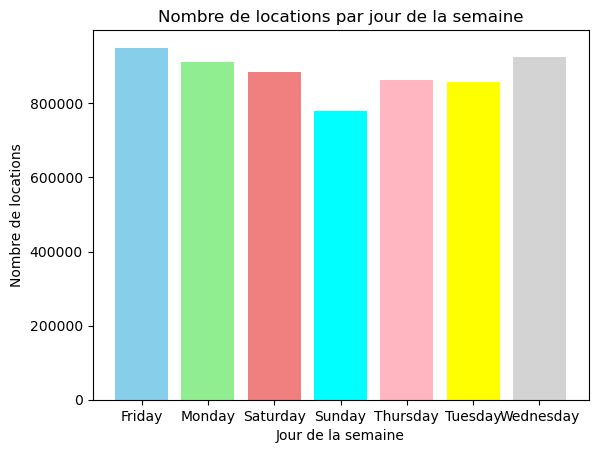

In [18]:
import matplotlib.pyplot as plt

# Grouper le dataframe par jour de la semaine et calculer la somme des locations
df_grouped = df.groupby("weekday")["Rented Bike Count"].sum()

# Définir des couleurs pour chaque jour de la semaine
colors = ['skyblue', 'lightgreen', 'lightcoral', 'cyan', 'lightpink', 'yellow', 'lightgrey']

# Créer un graphique à barres avec matplotlib en utilisant des couleurs personnalisées
plt.bar(df_grouped.index, df_grouped.values, color=colors)
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre de locations")
plt.title("Nombre de locations par jour de la semaine")
plt.show()


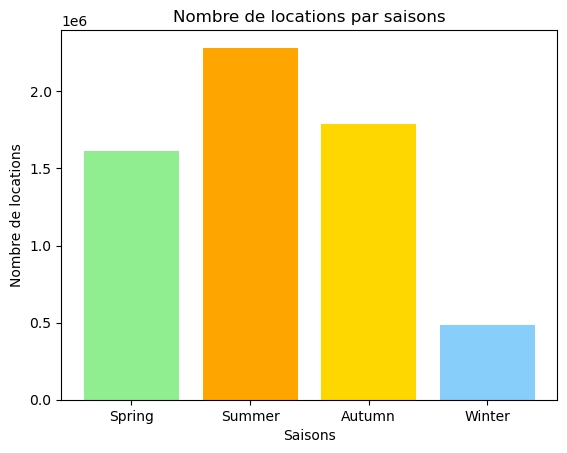

In [19]:
import matplotlib.pyplot as plt

# Créer une liste des jours de la semaine
seasons = ["Spring", "Summer", "Autumn", "Winter"]

# Créer une liste vide pour stocker le nombre de locations par jour
locations = []

# Parcourir chaque jour de la semaine
for season in seasons:
    # Filtrer le dataframe selon la colonne correspondant au jour
    df_season = df[df[season] == 1]
    # Calculer la somme des locations pour ce jour
    sum_season = df_season["Rented Bike Count"].sum()
    # Ajouter le résultat à la liste des locations
    locations.append(sum_season)

# Définir des couleurs pour chaque saison
colors = ['lightgreen', 'orange', 'gold', 'lightskyblue']

# Créer un graphique à barres avec les jours en abscisse et les locations en ordonnée
plt.bar(seasons, locations, color=colors)
# Ajouter un titre au graphique
plt.title("Nombre de locations par saisons")
# Ajouter des étiquettes aux axes
plt.xlabel("Saisons")
plt.ylabel("Nombre de locations")
# Afficher le graphique
plt.show()


In [20]:
# On supprime seasons car on a de nouvelles colonnes pour connaitre la saison
df.drop("Seasons", axis=1, inplace=True)

# Créer un dictionnaire pour mapper les string de weekday en numérotation
weekday_dict = {"Monday": 0, "Tuesday": 1, "Wednesday": 2, "Thursday": 3, "Friday": 4, "Saturday": 5, "Sunday": 6}

# Appliquer le dictionnaire sur la colonne weekday du dataframe
df["weekday"] = df["weekday"].map(weekday_dict)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8465 non-null   int64  
 1   Hour                       8465 non-null   int64  
 2   Temperature(°C)            8465 non-null   float64
 3   Humidity(%)                8465 non-null   int64  
 4   Wind speed (m/s)           8465 non-null   float64
 5   Visibility (10m)           8465 non-null   int64  
 6   Dew point temperature(°C)  8465 non-null   float64
 7   Solar Radiation (MJ/m2)    8465 non-null   float64
 8   Rainfall(mm)               8465 non-null   float64
 9   Snowfall (cm)              8465 non-null   float64
 10  Holiday                    8465 non-null   int64  
 11  weekday                    8465 non-null   int64  
 12  Day                        8465 non-null   int64  
 13  Month                      8465 non-null   int64

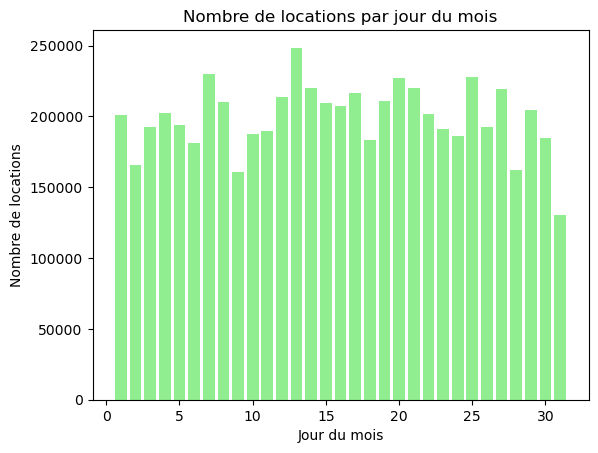

In [22]:
import matplotlib.pyplot as plt

# Grouper le dataframe par jour de la semaine et calculer la somme des locations
df_grouped = df.groupby("Day")["Rented Bike Count"].sum()

# Définir une couleur pour les barres
bar_color = 'lightgreen'

# Créer un graphique à barres avec matplotlib en utilisant la couleur définie
plt.bar(df_grouped.index, df_grouped.values, color=bar_color)
plt.xlabel("Jour du mois")
plt.ylabel("Nombre de locations")
plt.title("Nombre de locations par jour du mois")
plt.show()


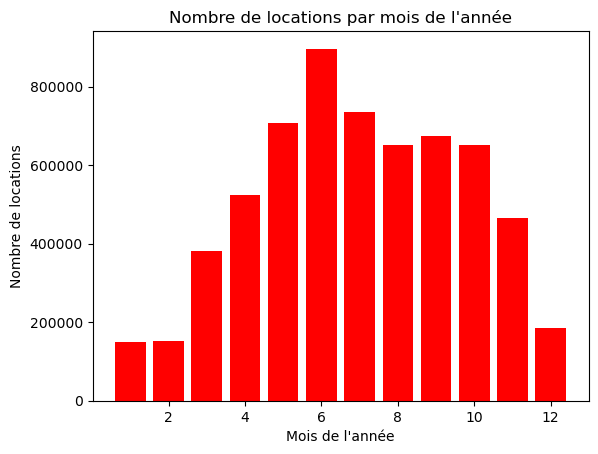

In [24]:
# Grouper le dataframe par jour de la semaine et calculer la somme des locations
df_grouped = df.groupby("Month")["Rented Bike Count"].sum()

# Définir une couleur pour les barres
bar_color = 'red'

# Créer un graphique à barres avec matplotlib
plt.bar(df_grouped.index, df_grouped.values, color=bar_color)
plt.xlabel("Mois de l'année")
plt.ylabel("Nombre de locations")
plt.title("Nombre de locations par mois de l'année")
plt.show()

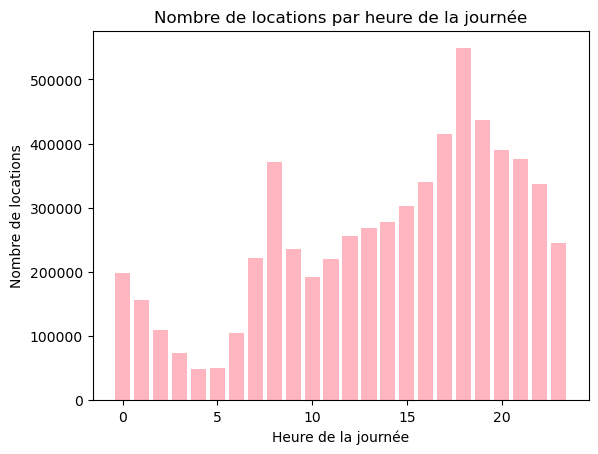

In [30]:
# Grouper le dataframe par jour de la semaine et calculer la somme des locations
df_grouped = df.groupby("Hour")["Rented Bike Count"].sum()

# Définir une couleur pour les barres
bar_color = 'lightpink'

# Créer un graphique à barres avec matplotlib
plt.bar(df_grouped.index, df_grouped.values, color=bar_color)
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre de locations")
plt.title("Nombre de locations par heure de la journée")
plt.show()

<Axes: xlabel='Rainfall catégorielle', ylabel='Température catégorielle'>

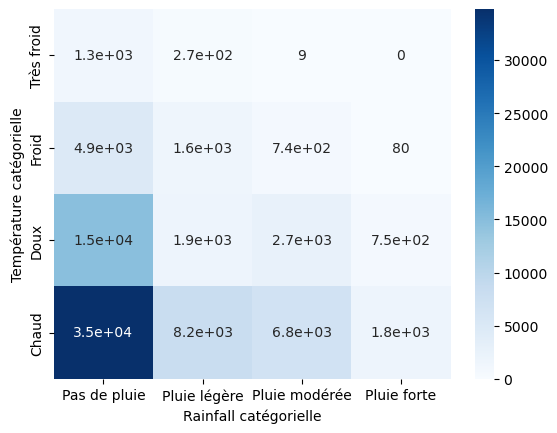

In [33]:
# Sélectionner les colonnes Rented Bike Count, Temperature(°C) et Rainfall(mm) du dataframe
df_heatmap = df[["Rented Bike Count", "Temperature(°C)", "Rainfall(mm)"]].copy()

# Créer une colonne Température catégorielle qui regroupe les valeurs de température en 6 intervalles
df_heatmap["Température catégorielle"] = pd.cut(df_heatmap["Temperature(°C)"], bins=[-10, 0, 10, 20, 30], labels=["Très froid", "Froid", "Doux", "Chaud"])

# Créer une colonne Rainfall catégorielle qui regroupe les valeurs de rainfall en 5 intervalles
df_heatmap["Rainfall catégorielle"] = pd.cut(df_heatmap["Rainfall(mm)"], bins=[0, 1, 2, 7, 30], labels=["Pas de pluie", "Pluie légère", "Pluie modérée", "Pluie forte"])

# Calculer la moyenne du nombre de location par groupe de température et de rainfall
df_heatmap = df_heatmap.groupby(["Température catégorielle", "Rainfall catégorielle"])["Rented Bike Count"].sum().unstack()

# Tracer la heat map avec seaborn
sns.heatmap(df_heatmap, annot=True, cmap="Blues")


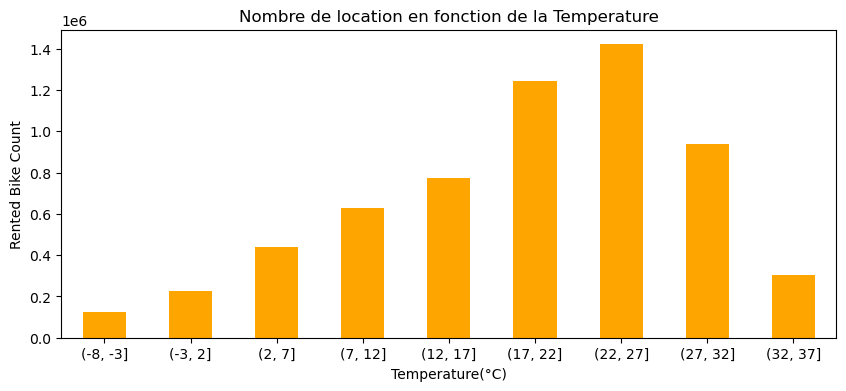

In [35]:
# Sélectionner les colonnes Rented Bike Count et Rainfall(mm) du dataframe
df_bar = df[["Rented Bike Count", "Temperature(°C)"]].copy()

# Créer une colonne Rainfall catégorielle qui regroupe les valeurs de rainfall en 5 intervalles
df_bar["Temperature(°C)"] = pd.cut(df_bar["Temperature(°C)"], bins=[-8, -3, 2, 7, 12, 17, 22, 27, 32, 37])

# Calculer le nombre total de location par groupe de rainfall
df_bar = df_bar.groupby("Temperature(°C)")["Rented Bike Count"].sum()

plt.figure(figsize=(10, 4))

# Tracer le graphique en bâton avec matplotlib
df_bar.plot.bar(rot=0, color="orange")

plt.xlabel("Temperature(°C)")
plt.ylabel("Rented Bike Count")
plt.title("Nombre de location en fonction de la Temperature")


# Afficher les graphiques
plt.show()

<Axes: >

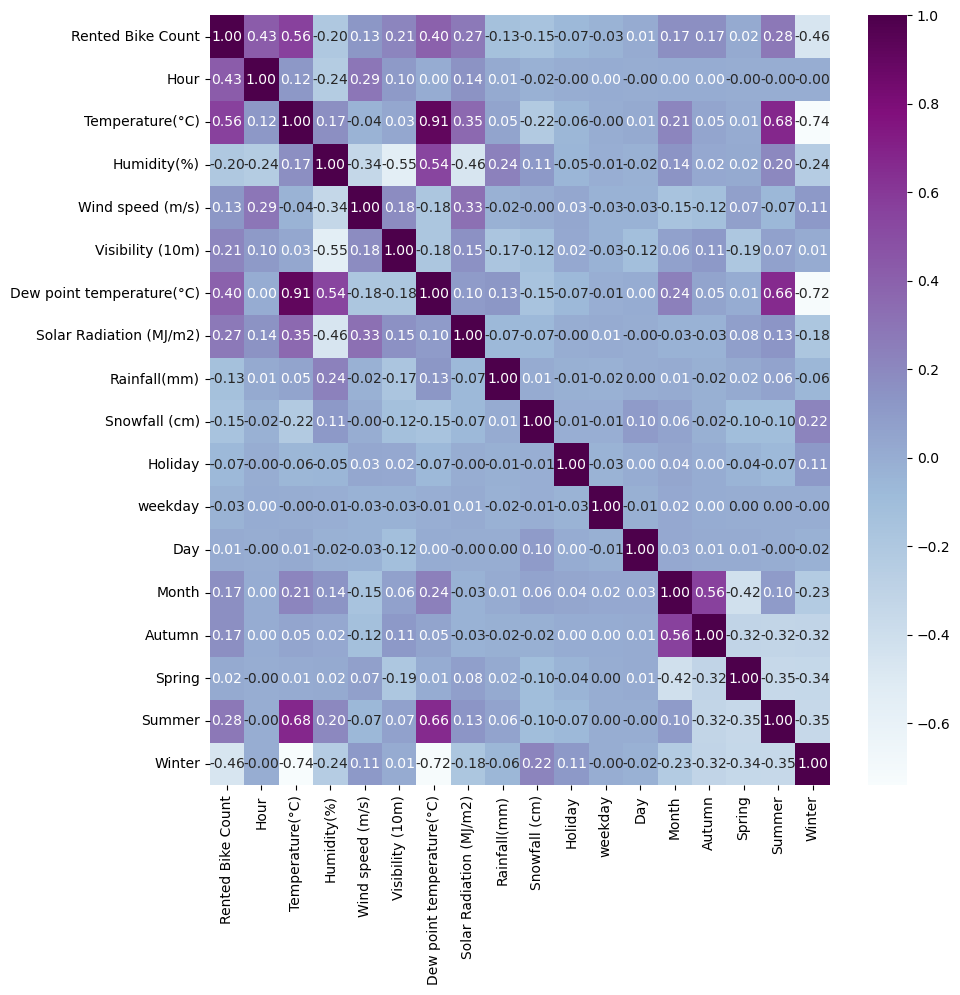

In [18]:
# Matrice de corrélation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap="BuPu", fmt=".2f")

In [37]:
# Trop corrélé avec la température, on peut s'en passer
df.drop("Dew point temperature(°C)", axis=1, inplace=True)

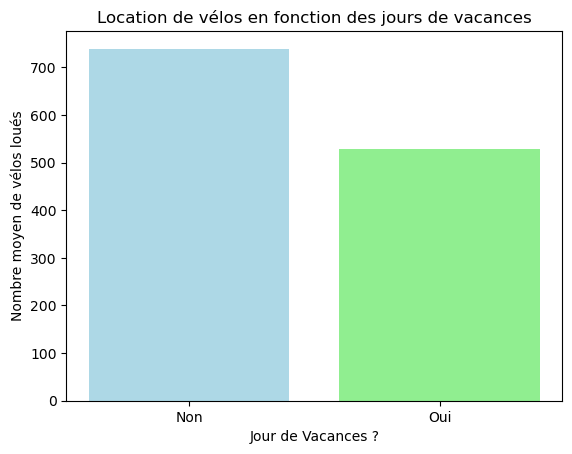

In [39]:
# Regrouper les données par jour de vacances et calculer la moyenne du nombre de vélos loués
df_grouped = df.groupby('Holiday')['Rented Bike Count'].mean()

# Créer le graphe en bâton
plt.bar(x=df_grouped.index, height=df_grouped.values, color=['lightblue', 'lightgreen'])
plt.xticks([0, 1], ['Non', 'Oui'])
plt.xlabel('Jour de Vacances ?')
plt.ylabel('Nombre moyen de vélos loués')
plt.title('Location de vélos en fonction des jours de vacances')
plt.show()

In [21]:
x = df.drop("Rented Bike Count", axis=1)
y = df["Rented Bike Count"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=21)


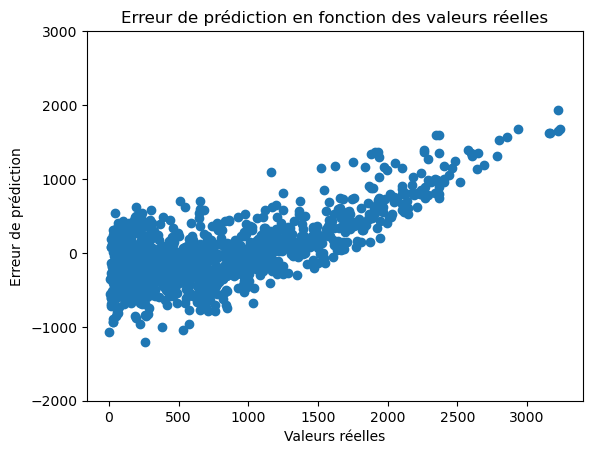

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

# Calculer l'erreur de prédiction
error = y_test - y_pred

# Tracer le nuage de points de l'erreur
plt.scatter(y_test, error)
plt.title("Erreur de prédiction en fonction des valeurs réelles")
plt.xlabel("Valeurs réelles")
plt.ylabel("Erreur de prédiction")
plt.ylim((-2000, 3000))
plt.show()

mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

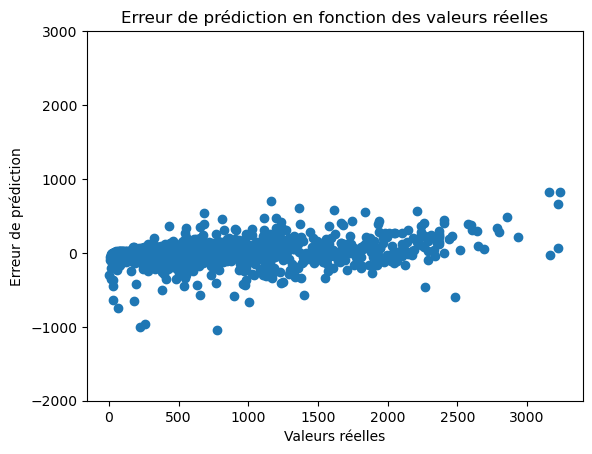

In [23]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor().fit(x_train, y_train)
y_pred_rfr = rfr.predict(x_test)

# Calculer l'erreur de prédiction
error = y_test - y_pred_rfr

# Tracer le nuage de points de l'erreur
plt.scatter(y_test, error)
plt.title("Erreur de prédiction en fonction des valeurs réelles")
plt.xlabel("Valeurs réelles")
plt.ylabel("Erreur de prédiction")
plt.ylim((-2000, 3000))
plt.show()

mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

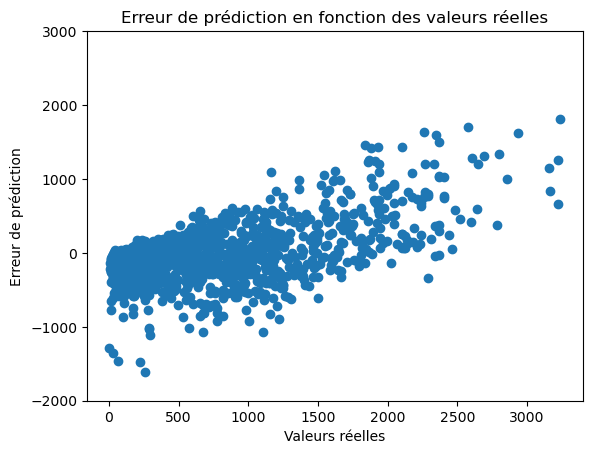

In [24]:
from sklearn.neighbors import KNeighborsRegressor

knnr = KNeighborsRegressor().fit(x_train, y_train)
y_pred_knnr = knnr.predict(x_test)

# Calculer l'erreur de prédiction
error = y_test - y_pred_knnr

# Tracer le nuage de points de l'erreur
plt.scatter(y_test, error)
plt.title("Erreur de prédiction en fonction des valeurs réelles")
plt.xlabel("Valeurs réelles")
plt.ylabel("Erreur de prédiction")
plt.ylim((-2000, 3000))
plt.show()

mse_knn = mean_squared_error(y_test, y_pred_knnr)
mae_knn = mean_absolute_error(y_test, y_pred_knnr)
r2_knn = r2_score(y_test, y_pred_knnr)

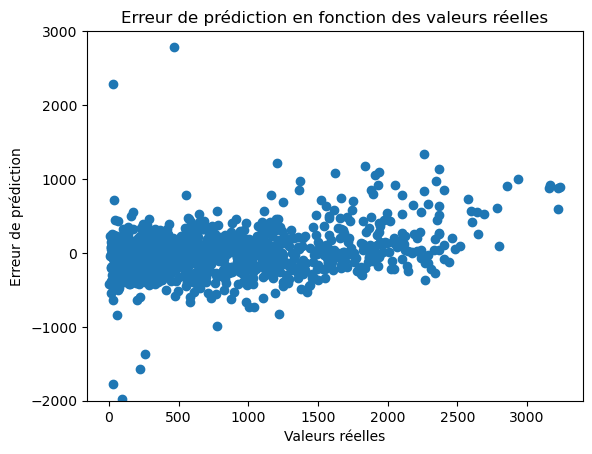

Shape of y_pred :  (1270,)
Shape of y_test :  (1270,)
0.7906832539388251


In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(x)
x_poly_train, x_poly_test, y_train2, y_test2 = train_test_split(x_poly, y, test_size=0.15, random_state=21)
lr_poly = LinearRegression()
lr_poly.fit(x_poly_train, y_train2)
y_poly_pred = lr_poly.predict(x_poly_test)


# Calculer l'erreur de prédiction
error = y_test2 - y_poly_pred

# Tracer le nuage de points de l'erreur
plt.scatter(y_test2, error)
plt.title("Erreur de prédiction en fonction des valeurs réelles")
plt.xlabel("Valeurs réelles")
plt.ylabel("Erreur de prédiction")
plt.ylim((-2000, 3000))
plt.show()

mse_poly = mean_squared_error(y_test2, y_poly_pred)
mae_poly = mean_absolute_error(y_test2, y_poly_pred)
r2_poly = r2_score(y_test2, y_poly_pred)

print("Shape of y_pred : ", y_pred.shape)
print("Shape of y_test : ", y_test.shape)

print(r2_poly)

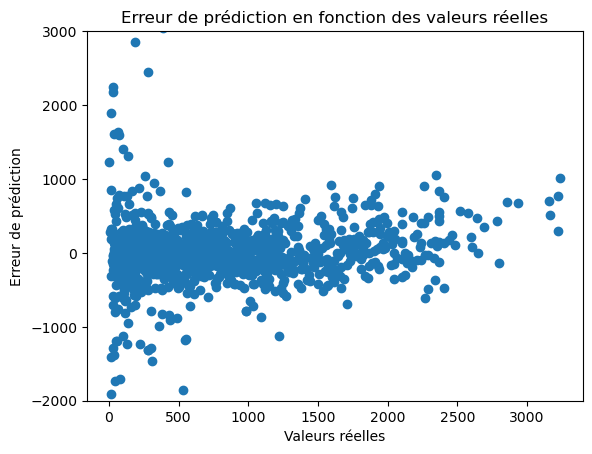

In [26]:

poly2 = PolynomialFeatures(degree=4)
x_poly2 = poly2.fit_transform(x)
x_poly_train2, x_poly_test2, y_train2, y_test2 = train_test_split(x_poly2, y, test_size=0.15, random_state=21)
lr_poly = LinearRegression()
lr_poly.fit(x_poly_train2, y_train2)
y_poly_pred2 = lr_poly.predict(x_poly_test2)

# Calculer l'erreur de prédiction
error = y_test2 - y_poly_pred2

# Tracer le nuage de points de l'erreur
plt.scatter(y_test2, error)
plt.title("Erreur de prédiction en fonction des valeurs réelles")
plt.xlabel("Valeurs réelles")
plt.ylabel("Erreur de prédiction")
plt.ylim((-2000, 3000))
plt.show()

mse_poly2 = mean_squared_error(y_test2, y_poly_pred2)
mae_poly2 = mean_absolute_error(y_test2, y_poly_pred2)
r2_poly2 = r2_score(y_test2, y_poly_pred2)

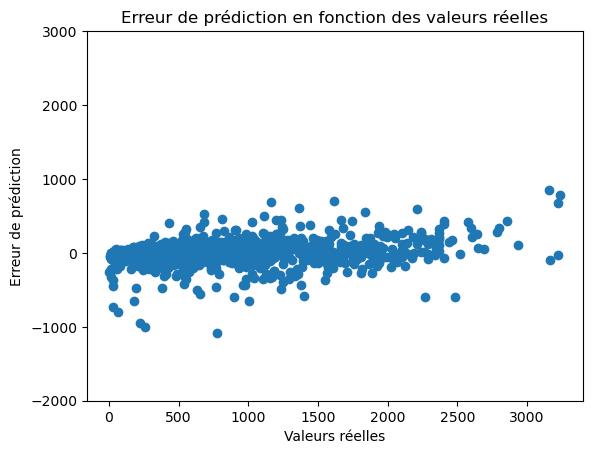

In [27]:
# Importer la classe StackingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR


# Définir les estimateurs de base
base_estimators = [
    ("ridge", Ridge()),
    ("svr", SVR()),
    ("rf", RandomForestRegressor())
]

# Définir l'estimateur final
final_estimator = LinearRegression()

# Créer un objet StackingRegressor
stacking_regressor = StackingRegressor(
    estimators=base_estimators,
    final_estimator=final_estimator
)

# Ajuster le modèle sur les données d'entraînement
stacking_regressor.fit(x_train, y_train)

# Prédire les valeurs de la variable cible sur les données de test
y_pred_sr = stacking_regressor.predict(x_test)

# Calculer l'erreur de prédiction
error = y_test - y_pred_sr

# Tracer le nuage de points de l'erreur
plt.scatter(y_test, error)
plt.title("Erreur de prédiction en fonction des valeurs réelles")
plt.xlabel("Valeurs réelles")
plt.ylabel("Erreur de prédiction")
plt.ylim((-2000, 3000))
plt.show()

mse_sr = mean_squared_error(y_test, y_pred_sr)
mae_sr = mean_absolute_error(y_test, y_pred_sr)
r2_sr = r2_score(y_test, y_pred_sr)

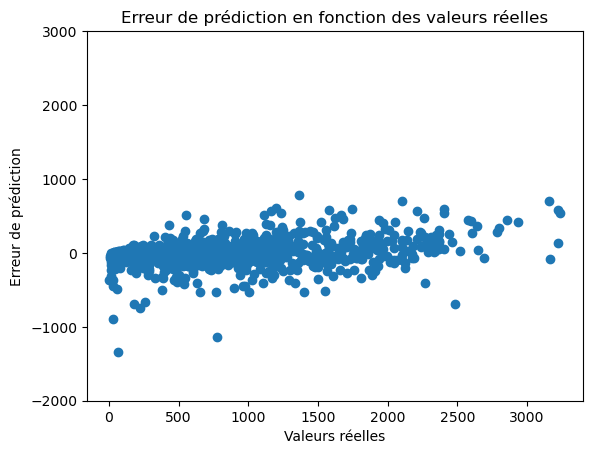

In [28]:
from sklearn.ensemble import BaggingRegressor

br = BaggingRegressor()
br.fit(x_train, y_train)

y_pred_br = br.predict(x_test)

error = y_test - y_pred_br
plt.scatter(y_test, error)
plt.title("Erreur de prédiction en fonction des valeurs réelles")
plt.xlabel("Valeurs réelles")
plt.ylabel("Erreur de prédiction")
plt.ylim((-2000, 3000))
plt.show()

mse_br = mean_squared_error(y_test, y_pred_br)
mae_br = mean_absolute_error(y_test, y_pred_br)
r2_br = r2_score(y_test, y_pred_br)

40/40 [==============================] - 0s 734us/step


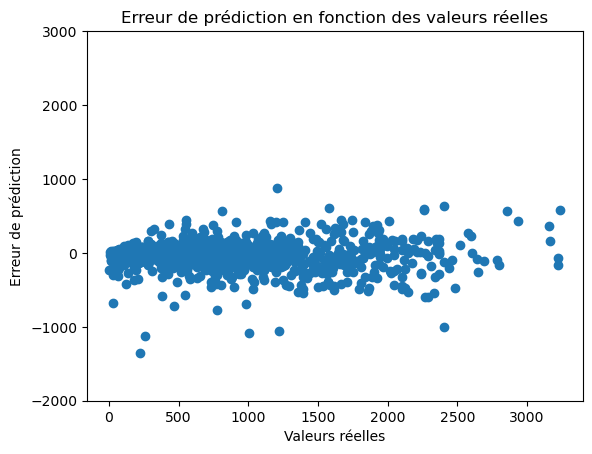

In [45]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

# Diviser le jeu de données en jeu d'entraînement et jeu de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=21)

# Normaliser les données
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Créer le modèle de réseau de neurones
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compiler le modèle
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Entraîner le modèle
model.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.1, verbose = 0)

# Faire une prédiction y_predict à partir de X_test
y_predict = model.predict(x_test)

y_predict = y_predict.flatten()

error = y_test - y_predict
plt.scatter(y_test, error)
plt.title("Erreur de prédiction en fonction des valeurs réelles")
plt.xlabel("Valeurs réelles")
plt.ylabel("Erreur de prédiction")
plt.ylim((-2000, 3000))
plt.show()

# Calculer le R2
r2_nn = r2_score(y_test, y_predict)
mse_nn = mean_squared_error(y_test, y_predict)
mae_nn = mean_absolute_error(y_test, y_predict)

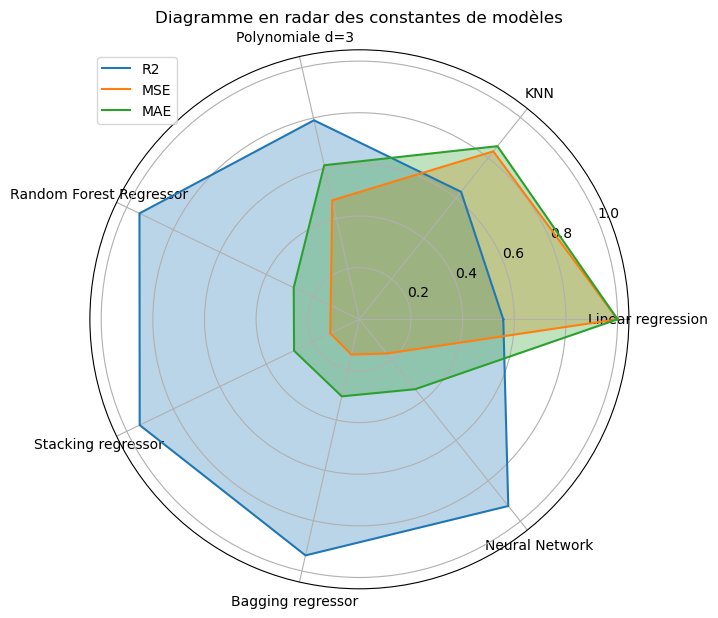

In [46]:

# Définir les données pour 7 modèles
noms = ["Linear regression", "KNN", "Polynomiale d=3", "Random Forest Regressor", "Stacking regressor", "Bagging regressor", "Neural Network"]
mse = [mse_lr, mse_knn, mse_poly, mse_rfr, mse_sr, mse_br, mse_nn]
r2 = [r2_lr, r2_knn, r2_poly, r2_rfr, r2_sr, r2_br, r2_nn]
mae = [mae_lr, mae_knn, mae_poly, mae_rfr, mae_sr, mae_br, mae_nn]

mse = np.multiply(mse, 1/np.max(mse))
mae = np.multiply(mae, 1/np.max(mae))

# Créer une figure et un axe polaire
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, polar=True)

# Calculer les angles et les rayons pour chaque modèle
angles = np.linspace(0, 2 * np.pi, len(noms), endpoint=False)
angles = np.concatenate((angles, [angles[0]])) # Fermer le polygone
r2 = np.concatenate((r2, [r2[0]])) # Fermer le polygone
mse = np.concatenate((mse, [mse[0]])) # Fermer le polygone
mae = np.concatenate((mae, [mae[0]])) # Fermer le polygone

# Tracer les polygones pour chaque critère
ax.plot(angles, r2, label="R2")
ax.fill(angles, r2, alpha=0.3)
ax.plot(angles, mse, label="MSE")
ax.fill(angles, mse, alpha=0.3)
ax.plot(angles, mae, label="MAE")
ax.fill(angles, mae, alpha=0.3)

# Ajouter les noms des modèles comme étiquettes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(noms)

# Ajouter une légende et un titre
ax.legend(loc="upper left")
ax.set_title("Diagramme en radar des constantes de modèles")

# Afficher le graphique
plt.show()